In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [14]:
def show(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

## Generating a cross-section of the RGB color cube and its three hidden planes.

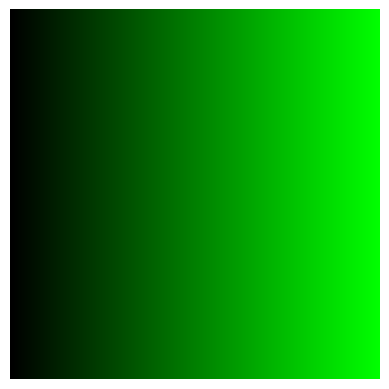

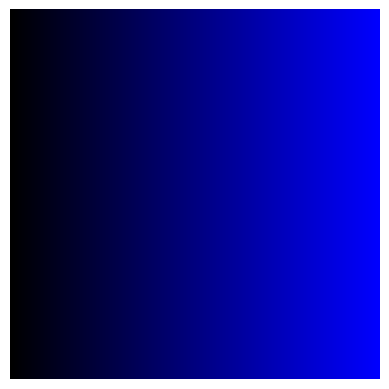

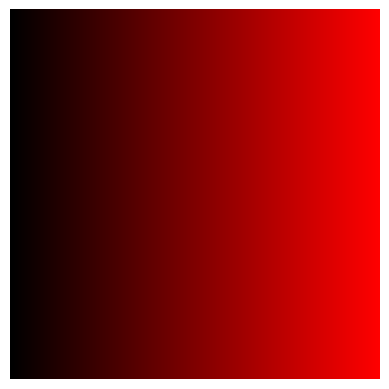

In [6]:
def generate_color_plane(fixed_color, size=256):
    # Create a 2D array for the color plane
    color_plane = np.zeros((size, size, 3), dtype=np.uint8)
    
    color_plane[:, :, fixed_color] = np.arange(size)
    
    return color_plane


def show(color_image):
    plt.imshow(color_image)
    plt.axis('off')
    plt.show()

# Example: Generate and display a color plane (G fixed)
green = generate_color_plane(fixed_color=1)
blue = generate_color_plane(fixed_color=2)
red = generate_color_plane(fixed_color=0)

show(green)
show(blue)
show(red)

## Converting colors from RGB to HSI

In [10]:
def rgb_to_hsi(rgb):
    r, g, b = rgb / 255.0  # Normalize to the range [0, 1]

    intensity = (r + g + b) / 3.0

    minimum = np.min([r, g, b])
    saturation = 1.0 - (3.0 / (r + g + b + 1e-10)) * minimum
#  is a scientific notation representing the number 1×10^−10. It's a way to write small numbers in a more concise form. In this context, it's used to avoid division by zero in the saturation calculation

    if saturation < 1e-10:
        hue = 0.0
    else:
        hue = 0.5 * ((r - g) + (r - b)) / np.sqrt((r - g)**2 + (r - b) * (g - b))
        hue = np.arccos(np.clip(hue, -1.0, 1.0))

        if b > g:
            hue = 2.0 * np.pi - hue

    # Convert hue to degrees
    hue = hue * (180.0 / np.pi)

    return hue, saturation, intensity

# Example
rgb_color = np.array([255, 0, 255])
hsi_color = rgb_to_hsi(rgb_color)
print("RGB:", rgb_color)
print("HSI:", hsi_color)

RGB: [255   0 255]
HSI: (299.99999999999994, 1.0, 0.6666666666666666)


## Converting colors from HSI to RGB

In [12]:
def hsi_to_rgb(h, s, i):
    # Normalize hue to the range [0, 360)
    h = h % 360.0

    # Formula for HSI to RGB conversion
    h /= 60.0
    c = i * s
    x = c * (1 - np.abs((h % 2) - 1))
    m = i - c

    # Define RGB components based on the hue value
    if 0 <= h < 1:
        rgb = [c, x, 0]
    elif 1 <= h < 2:
        rgb = [x, c, 0]
    elif 2 <= h < 3:
        rgb = [0, c, x]
    elif 3 <= h < 4:
        rgb = [0, x, c]
    elif 4 <= h < 5:
        rgb = [x, 0, c]
    else:
        rgb = [c, 0, x]

    # Adjust for intensity and return RGB values
    rgb = [channel + m for channel in rgb]
    return rgb

# Example usage:
hue = 120.0 
saturation = 0.5 
intensity = 0.8 

rgb_result = hsi_to_rgb(hue, saturation, intensity)
print("RGB Result:", rgb_result)

RGB Result: [0.4, 0.8, 0.4]


## The HSI values corresponding to the image of the RGB color cube.

C:\Users\PC\AppData\Local\Temp\ipykernel_12408\2808286504.py:14: RuntimeWarning: invalid value encountered in divide
  S = np.where(den < epsilon, 0, num / den)
C:\Users\PC\AppData\Local\Temp\ipykernel_12408\2808286504.py:17: RuntimeWarning: invalid value encountered in divide
  theta = np.arccos(0.5 * ((R - G) + (R - B)) / np.sqrt((R - G)**2 + (R - B) * (G - B)))


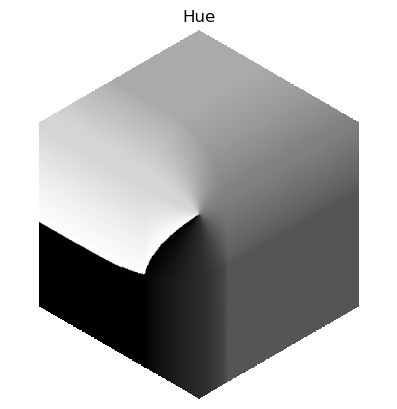

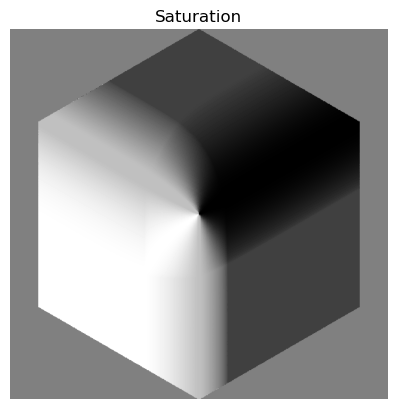

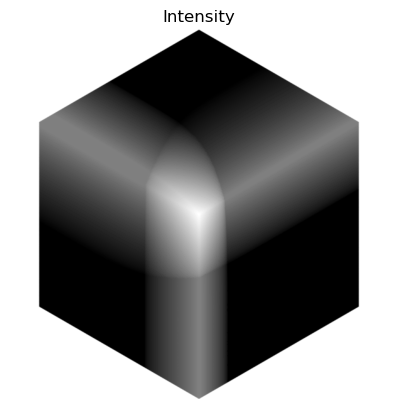

In [11]:
def rgb_to_hsi(rgb_image):
    # Normalize the RGB values to the range [0, 1]
    normalized_rgb = rgb_image / 255.0
    
    R, G, B = normalized_rgb[:, :, 0], normalized_rgb[:, :, 1], normalized_rgb[:, :, 2]
    
    # intensity
    I = (R + G + B) / 3.0
    
    # saturation
    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G)**2 + (R - B) * (G - B))
    epsilon = 1e-8
    S = np.where(den < epsilon, 0, num / den)
    
    # hue
    theta = np.arccos(0.5 * ((R - G) + (R - B)) / np.sqrt((R - G)**2 + (R - B) * (G - B)))
    H = np.where(B <= G, theta, 2 * np.pi - theta) * 180 / np.pi
    
    # Normalize hue to the range [0, 1]
    H = H / 360.0
    
    return H, S, I


# Load the RGB color cube image (Fig. 6.8)
rgb_color_cube = plt.imread('../contents/rgb_color_cube.png')

# Convert RGB to HSI
hue, saturation, intensity = rgb_to_hsi(rgb_color_cube)

# Display the HSI images
show(hue, 'Hue')
show(saturation, 'Saturation')
show(intensity, 'Intensity')

##  Intensity slicing and color coding.

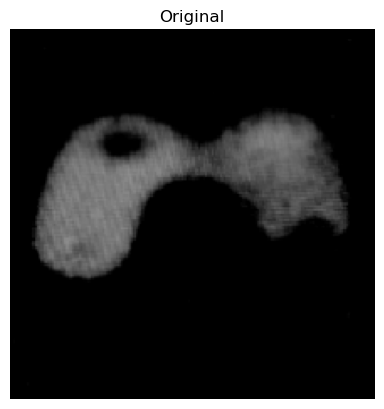

(220, 217, 3)


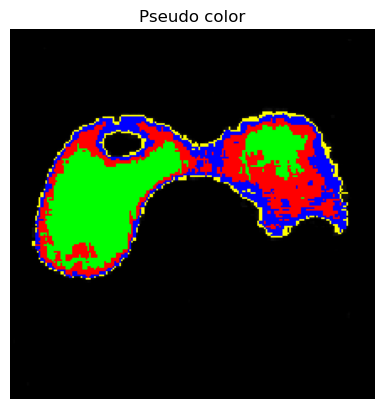

In [17]:
image = cv2.imread('../contents/Fig0620(a)(picker_phantom).tif')
show(image, 'Original')
print(image.shape)

result = np.zeros((image.shape[0], image.shape[1], image.shape[2]), dtype=np.uint8)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i,j, 0] >= 100 and image[i,j, 1] >= 100 and image[i,j, 2] >= 100:
            result[i,j, 1] = 255
            result[i,j, 0] = 0
            result[i,j, 2] = 0
        elif image[i,j, 0] >= 70 and image[i,j,0] < 100 and image[i,j, 1] >= 70 and image[i,j, 1] < 100 and image[i,j, 2] >= 70 and image[i,j,2] < 100:
            result[i,j, 1] = 0
            result[i,j, 0] = 255
            result[i,j, 2] = 0
        elif image[i,j, 0] >= 40 and image[i,j,0] < 70 and image[i,j, 1] >= 40 and image[i,j, 1] < 70 and image[i,j, 2] >= 40 and image[i,j,2] < 70:
            result[i,j, 1] = 0
            result[i,j, 0] = 0
            result[i,j, 2] = 255
        elif image[i,j, 0] >= 20 and image[i,j,0] < 40 and image[i,j, 1] >= 20 and image[i,j, 1] < 40 and image[i,j, 2] >= 20 and image[i,j,2] < 40:
            result[i,j, 1] = 255
            result[i,j, 0] = 255
            result[i,j, 2] = 0
        else:
            result[i,j, 0] = image[i,j, 0]
            result[i,j, 1] = image[i,j, 1]
            result[i,j, 2] = image[i,j, 2]
            
show(result, "Pseudo color")

##  Use of color to highlight rainfall levels

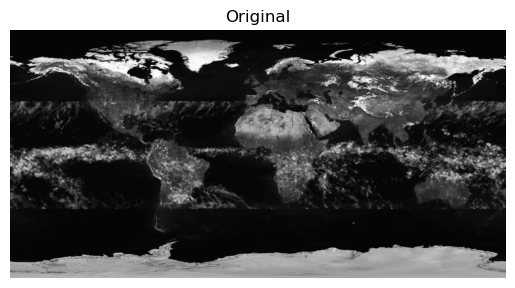

(1349, 2700)
(1349, 2700, 3)


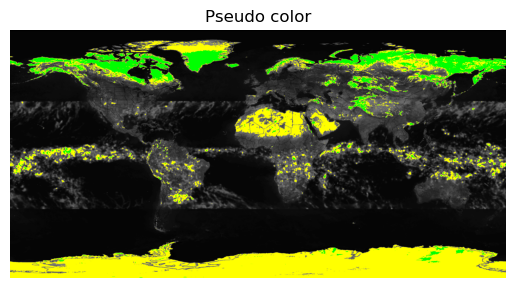

In [21]:
image = cv2.imread('../contents/Fig0622(a)(tropical_rain_grayscale.tif', 0)
show(image, 'Original')
print(image.shape)

result = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
print(result.shape)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i,j] >= 180:
            result[i,j, 1] = 255
            result[i,j, 0] = 0
            result[i,j, 2] = 0
        elif image[i,j] >= 130 and image[i,j]<180:
            result[i,j, 1] = 255
            result[i,j, 0] = 255
            result[i,j, 2] = 0
        else:
            result[i,j, 0] = image[i,j]
            result[i,j, 1] = image[i,j]
            result[i,j, 2] = image[i,j]
show(result, "Pseudo color")

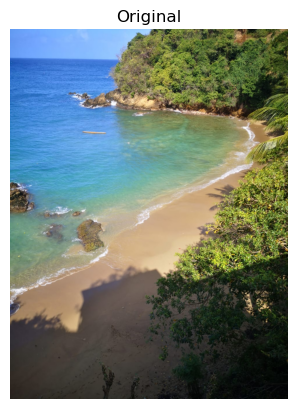

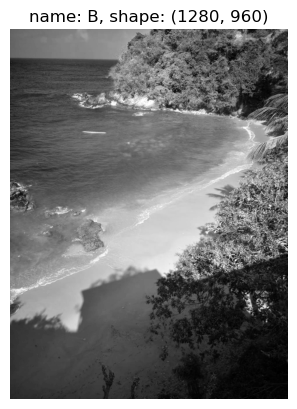

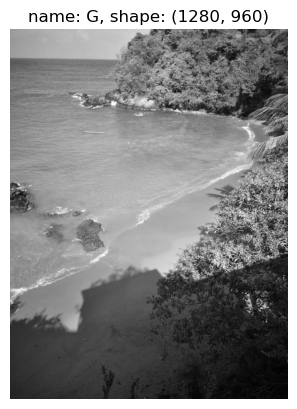

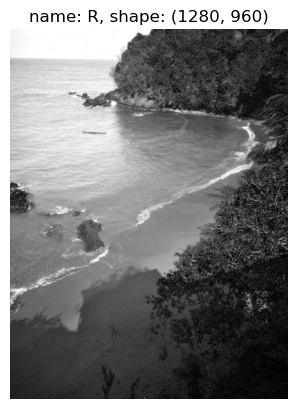

In [21]:
img = cv2.imread('../contents/castara.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show(img, 'Original')

channels = cv2.split(img)
names = ['B', 'G', 'R']

for name, channel in zip(names, channels):
    show(channel, f'name: {name}, shape: {channel.shape}')

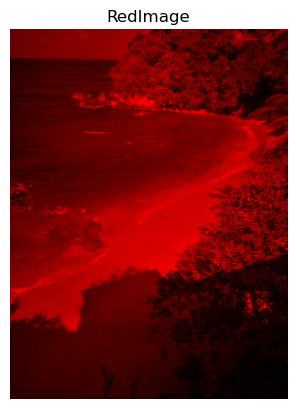

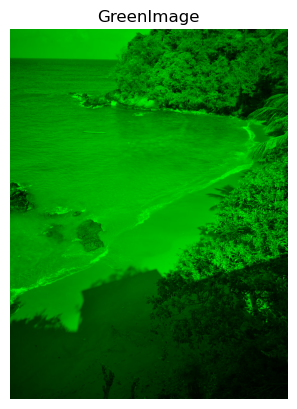

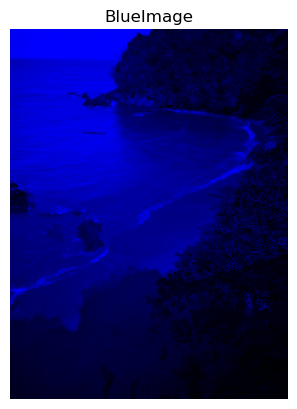

In [32]:
Blue, Green, Red = cv2.split(img)

emptyChannel = np.zeros(img.shape[:2], dtype='uint8')

redImage = cv2.merge([channels[0], emptyChannel, emptyChannel])
show(redImage, 'RedImage')


greenImage = cv2.merge([emptyChannel, channels[1], emptyChannel])
show(greenImage, 'GreenImage')


blueImage = cv2.merge([emptyChannel, emptyChannel, channels[2]])
show(blueImage, 'BlueImage')

## Color image smoothing by neighborhood averaging

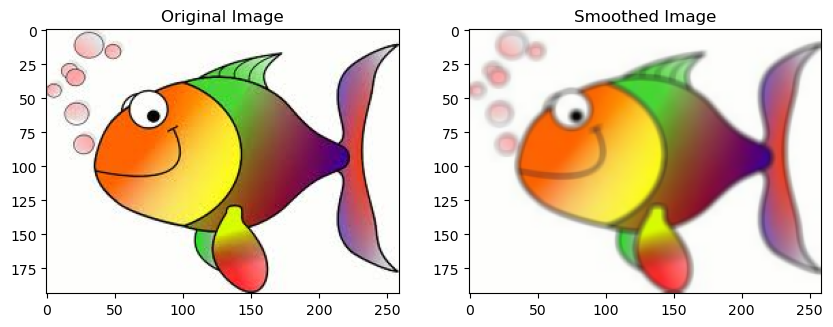

In [37]:
def smooth_color_image(image, neighborhood_size):

    # Convert BGR image to float32 for accurate calculations
    image_float = image.astype(np.float32)

    # Use OpenCV's filter2D function for neighborhood averaging
    kernel = np.ones((neighborhood_size, neighborhood_size), np.float32) / (neighborhood_size ** 2)
    smoothed_image = cv2.filter2D(image_float, -1, kernel)

    # Convert back to uint8 for display
    smoothed_image = np.clip(smoothed_image, 0, 255).astype(np.uint8)

    return smoothed_image

# Example usage:
color_image = cv2.imread('../contents/HappyFish.jpg')

neighborhood_size = 5

# Smooth the color image
smoothed_image = smooth_color_image(color_image, neighborhood_size)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB)), plt.title('Smoothed Image')
plt.show()

## Image sharpening using the Laplacian

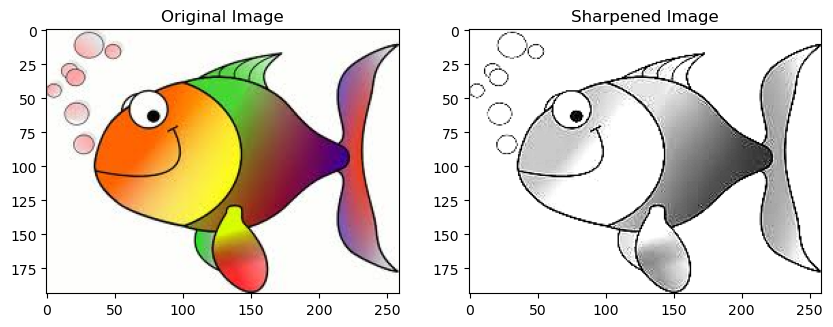

In [45]:
def sharpen_image_laplacian(image):
    # Convert image to grayscale if it's a color image
    if len(image.shape) == 3:
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        grayscale_image = image

    # Apply Laplacian filter
    laplacian = cv2.Laplacian(grayscale_image, cv2.CV_64F)

    # Ensure both images have the same data type before adding
    grayscale_image = grayscale_image.astype(np.float64)
    sharpened_image = cv2.addWeighted(grayscale_image, 1.5, laplacian, -0.5, 0)

    # Convert back to uint8 for display
    sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

    return sharpened_image

# Example usage:
image = cv2.imread('../contents/HappyFish.jpg')

# Sharpen the image using Laplacian
sharpened_image = sharpen_image_laplacian(image)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB)), plt.title('Sharpened Image')
plt.show()